In [193]:
import os.path as osp
import os
os.chdir('/mnt/data/akshit.jain/user_clicks/')
import pandas as pd
import numpy as np
from sklearn.neighbors import KDTree
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib


In [2]:
FSN_EMBEDDINGS = 'openrec_visual_feed_data/items.pk'
IMAGE_DIR='../visual_reco/product_images/'

In [3]:
df=pd.read_pickle(FSN_EMBEDDINGS)

In [14]:
embs=np.array(df.embs.tolist())
kdt = KDTree(embs, leaf_size=30, metric='euclidean')

In [121]:
import matplotlib.image as mpimg

def plot_images(fsns):
    imgs=[mpimg.imread(osp.join(IMAGE_DIR, f+'.jpg')) for f in fsns]
    N_COLS=5
    N_ROWS=(len(fsns)+N_COLS-1)//N_COLS
    f, axarr = plt.subplots(N_ROWS, N_COLS)
    [(ax.get_xaxis().set_visible(False), ax.get_yaxis().set_visible(False)) for ax in f.axes]
    
    f.tight_layout()
    for idx, fsn in enumerate(fsns):
        plt.axis('off')
        plot_row = idx//N_COLS
        plot_col = idx%N_COLS
        axarr[plot_row,plot_col].imshow(imgs[idx])
    plt.savefig('similar_demo_3.png')
    plt.show()

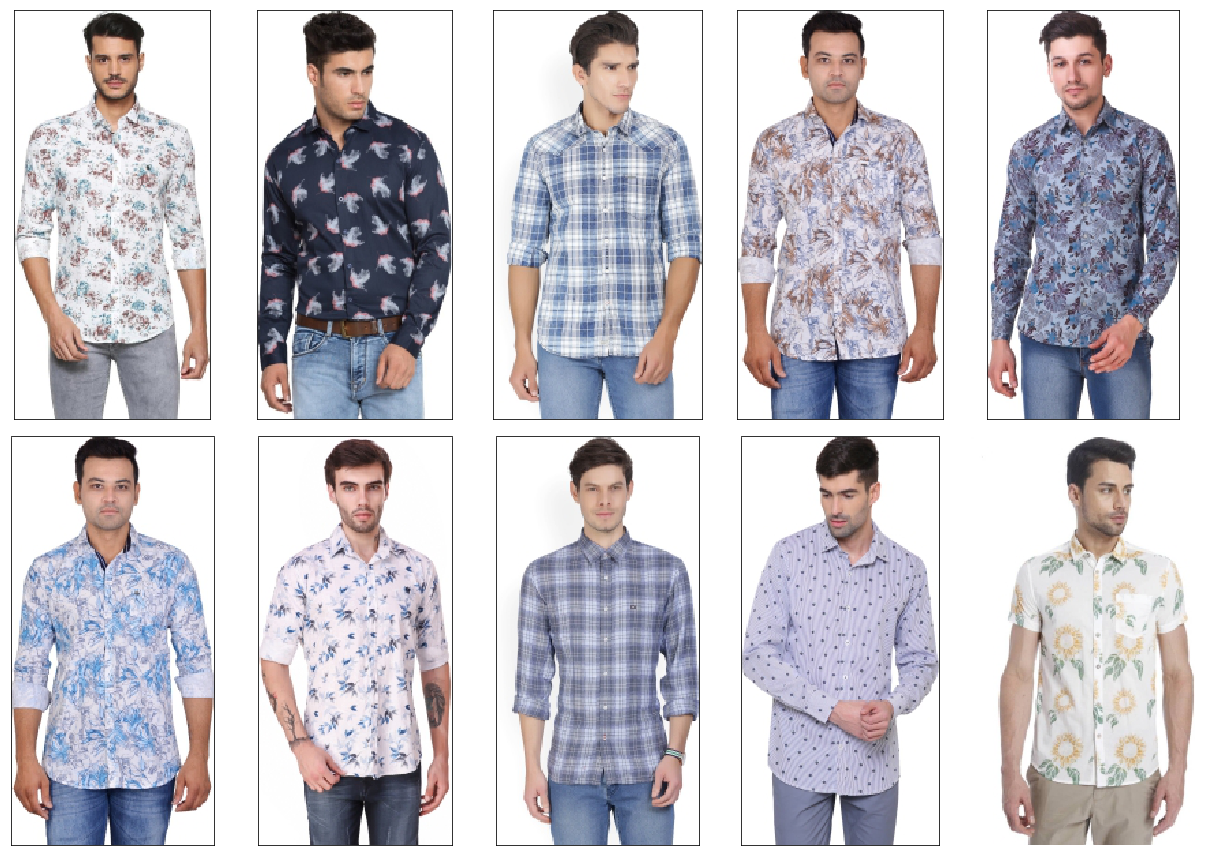

In [202]:
from random import randint
# good res: 8713: FLOWERS, 10972: checks, 15926: plain sober 
Q_IDX=8713#randint(0, df.shape[0])
NUM_NN=10
nns=kdt.query(embs[Q_IDX:Q_IDX+1], k=NUM_NN, return_distance=False)[0]
matplotlib.rcParams['figure.figsize'] = [17, 12]
plot_images(df.iloc[nns].fsn.tolist())

# Grouping of products for fast navigation

In [184]:
from sklearn.cluster import KMeans
N_CLUSTERS=20
kmeans = KMeans(n_clusters=N_CLUSTERS, random_state=0).fit(embs_pca)

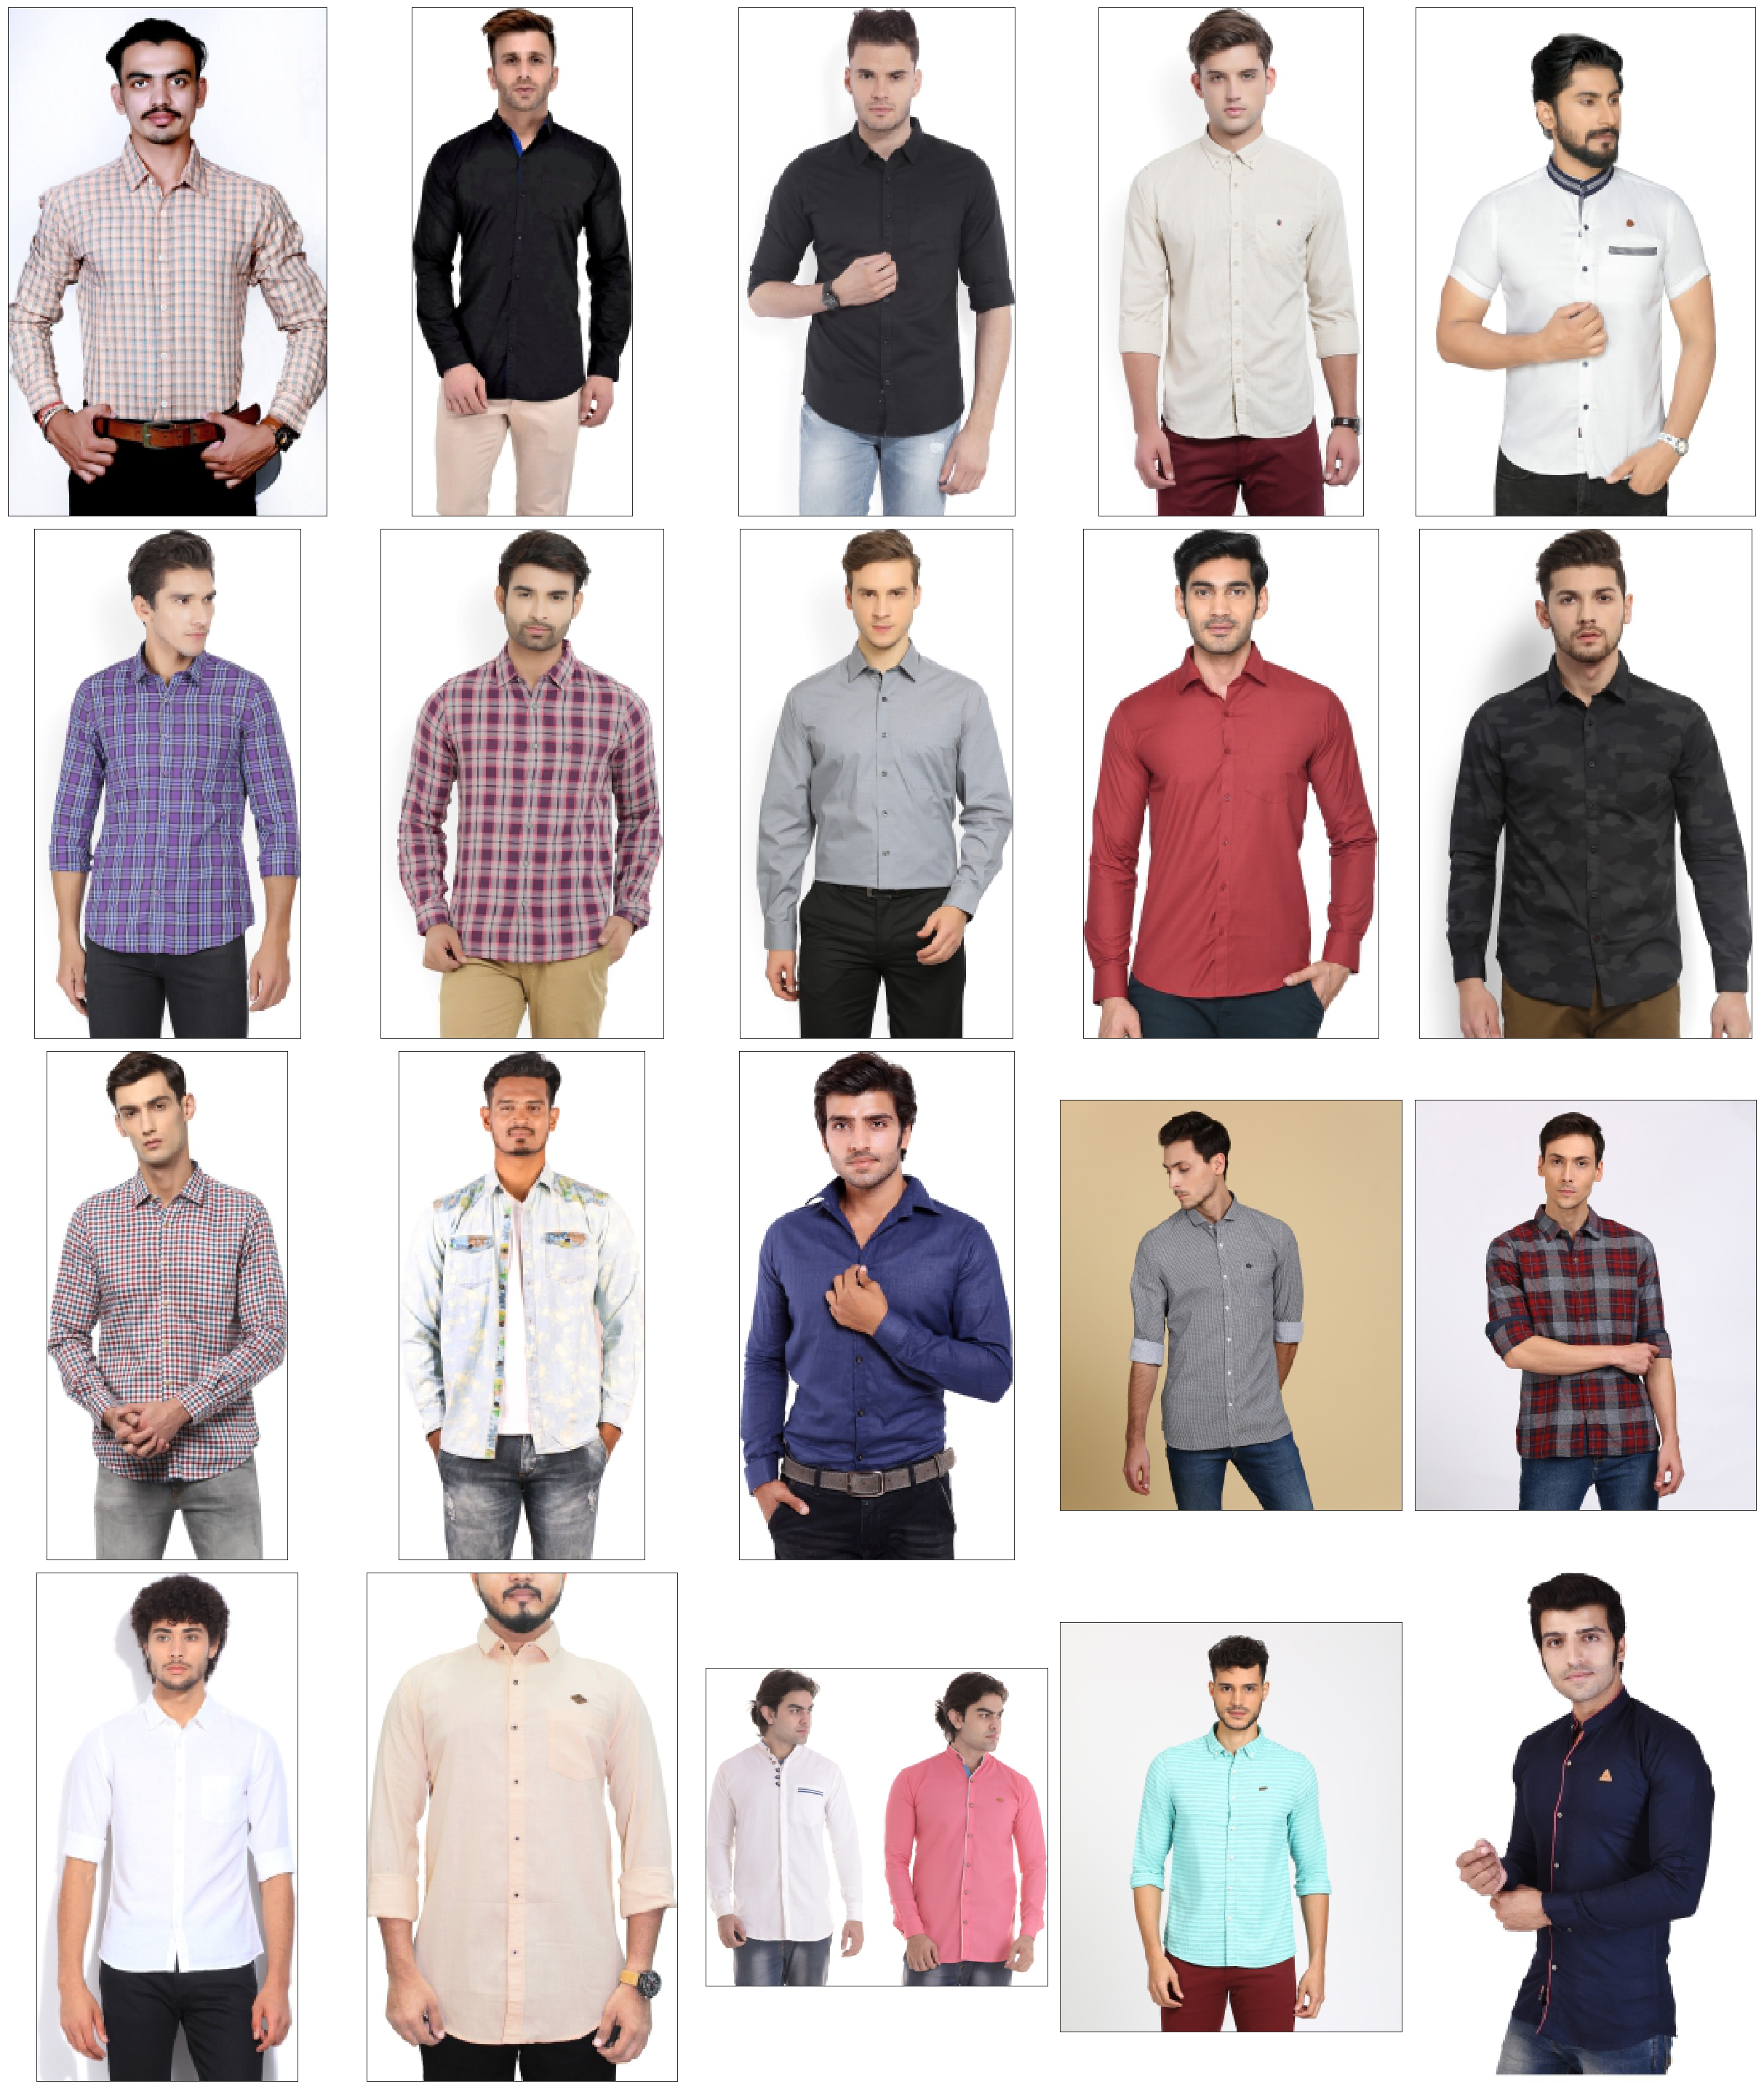

In [185]:
nav_fsns=[]
for LOOK_LABEL in range(N_CLUSTERS):
    nav_fsns.append(np.random.choice(df.iloc[kmeans.labels_==LOOK_LABEL].fsn.tolist()))
plot_images(nav_fsns)

In [189]:
LOOK_LABEL=11#randint(0, N_CLUSTERS)
plot_images(np.random.choice(df.iloc[kmeans.labels_==LOOK_LABEL].fsn.tolist(), 10))

In [181]:
from sklearn.decomposition import TruncatedSVD
embs_pca=TruncatedSVD(n_components=20).fit_transform(embs)

(23446, 20)